In [206]:
import numpy as np
import matplotlib.pyplot as plt
import epidemic_model_classes as epi_mod
from data_loading import LoadData 
from proj_consts import ProjectConsts
import pandas as pd
from PIL import Image
import time

log_path = "../logs/sdumont/log_test/"

data_path = open("data_path.txt", "r").read()
df_brazil_state_cases = pd.read_csv(data_path)

pop_state_dat = open(f"{ProjectConsts.DATA_PATH}/pop_states.csv", "r").read().split("\n")
pop_state = {}
for i in range(len(pop_state_dat)-1):
    pop_state_dat[i] = pop_state_dat[i].split(", ")
    pop_state[pop_state_dat[i][0]] = int(pop_state_dat[i][1])

152757.45

In [201]:
log = open(log_path+"log_geral.txt").read().split("\n")

RMSD = []
AIC = []

for i in range(len(log)):
    
    if ("RMSD" in log[i]):
        
        RMSD.append(np.float64(log[i].split(" ")[1]))
    
    if ("AIC" in log[i] and "Smallest" not in log[i]):
        
        AIC.append(np.float64(log[i].split(" ")[1]))
        
RMSD = np.array(RMSD).reshape((27, 5))
AIC = np.array(AIC).reshape((27, 5))

models = ["SIRD", "SEIRD", "SEIARD", "SEIHRD", "SEIQRD"]

print("Mean +/- Standard Deviation:\n")
print("RMSD:\n")

for i in range(len(models)):
    
    print(models[i]+":\t%.2f\t+/-\t%.2f\t\tmin: %.2f, max: %.2f" % (np.mean(RMSD, axis=0)[i], np.std(RMSD, axis=0)[i], np.min(RMSD[:,i]), np.max(RMSD[:,i])))

print("\n-----------------------------------------------------------------------------\n")

print("AIC:\n")

for i in range(len(models)):
    
    print(models[i]+":\t%.2f\t+/-\t%.2f\t\tmin:\t%.2f,\tmax:\t%.2f" % (np.mean(AIC, axis=0)[i], np.std(AIC, axis=0)[i], np.min(AIC[:,i]), np.max(AIC[:,i])))


Mean +/- Standard Deviation:

RMSD:

SIRD:	669.25	+/-	789.13		min: 90.16, max: 4232.36
SEIRD:	636.90	+/-	842.69		min: 103.37, max: 4630.66
SEIARD:	387.89	+/-	424.29		min: 53.44, max: 2205.26
SEIHRD:	690.46	+/-	756.25		min: 65.07, max: 4009.26
SEIQRD:	1627.46	+/-	1587.97		min: 395.74, max: 8475.40

-----------------------------------------------------------------------------

AIC:

SIRD:	-4.18	+/-	1.75		min:	-8.70,	max:	-1.00
SEIRD:	-0.07	+/-	1.70		min:	-4.88,	max:	2.72
SEIARD:	4.85	+/-	1.71		min:	0.60,	max:	8.04
SEIHRD:	7.69	+/-	1.73		min:	3.41,	max:	11.65
SEIQRD:	3.83	+/-	1.50		min:	-0.09,	max:	6.04


In [202]:
models = ["SIRD", "SEIRD", "SEIARD", "SEIHRD", "SEIQRD"]

def results(state, model):
    
    modelfunc = getattr(epi_mod, model)
    
    data = LoadData.getBrazilStateDataFrame(df_brazil_state_cases, state)
    x = np.array(data.day, dtype=np.float64)
    y = np.array(data[["confirmed", "dead"]].T, dtype=np.float64)
    y0 = np.zeros(modelfunc.ncomp, dtype=np.float64)
    y0[-2:] = data.loc[0,["confirmed", "dead"]]
    
    f = plt.figure(figsize=(24,32))
    
    for j in range(modelfunc.nparams):
        
        plt.subplot(4,3,j+1)
#         f.set_figheight=(6)
#         f.set_figwidth=(6)
        plt.axis("off")
        im = Image.open(log_path+state+"/"+model+"/posterior_"+modelfunc.params[j].replace("\\","").replace("$","")+".png").convert("RGB")
        plt.imshow(im)
    
    f.tight_layout()
    plt.show()
    
    plt.figure(figsize=(15,10))
    im = Image.open(log_path+state+"/"+model+"/"+model+"_fit.png").convert("RGB")
    plt.imshow(im)
    
    p = np.genfromtxt(log_path+state+"/"+model+"/best_params.txt")
    
def all_curves(state):
    
    data = LoadData.getBrazilStateDataFrame(df_brazil_state_cases, state)
    x = np.array(data.day, dtype=np.float64)
    y = np.array(data[["confirmed", "dead"]].T, dtype=np.float64)
    
    lstyles = ["solid", "dotted", "dashed", "dashdot", (0, (3, 5, 1, 5, 1, 5))]
    
    plt.figure(figsize=(15, 10))
    plt.scatter(x, y[0], facecolors="none", edgecolors="red",  label="Infected Data")
    plt.scatter(x, y[1], facecolors="none", edgecolors="green", label="Dead Data")
    plt.title("%s Fit" % (state))
    plt.xlabel("Days", fontsize=26)
    
    for i in range(len(models)):
        
        modelfunc = getattr(epi_mod, models[i])
        
        p = np.genfromtxt(log_path+state+"/"+models[i]+"/best_params.txt")
        
        y0 = np.zeros(modelfunc.ncomp, dtype=np.float64)
        y0[-2:] = data.loc[0,["confirmed", "dead"]]
        
        plt.plot(x, modelfunc.infected_dead(x, p, y0)[0], linestyle=lstyles[i], lw=3, color="red", label="Infected %s Fit" % (models[i]))
        plt.plot(x, modelfunc.infected_dead(x, p, y0)[1], linestyle=lstyles[i], lw=3, color="green", label="Dead %s Fit" % models[i])
    
    plt.legend(loc="upper left", fontsize=12, handlelength=5)

Location: DF

SIRD:

	RMSD: 539.547127
	AIC: -4.581460
SEIRD:

	RMSD: 473.178422
	AIC: -0.318945
SEIARD:

	RMSD: 401.540001
	AIC: 4.009386
SEIHRD:

	RMSD: 629.680894
	AIC: 7.109574
SEIQRD:

	RMSD: 2354.229428
	AIC: 2.472063

Smallest AIC: SIRD



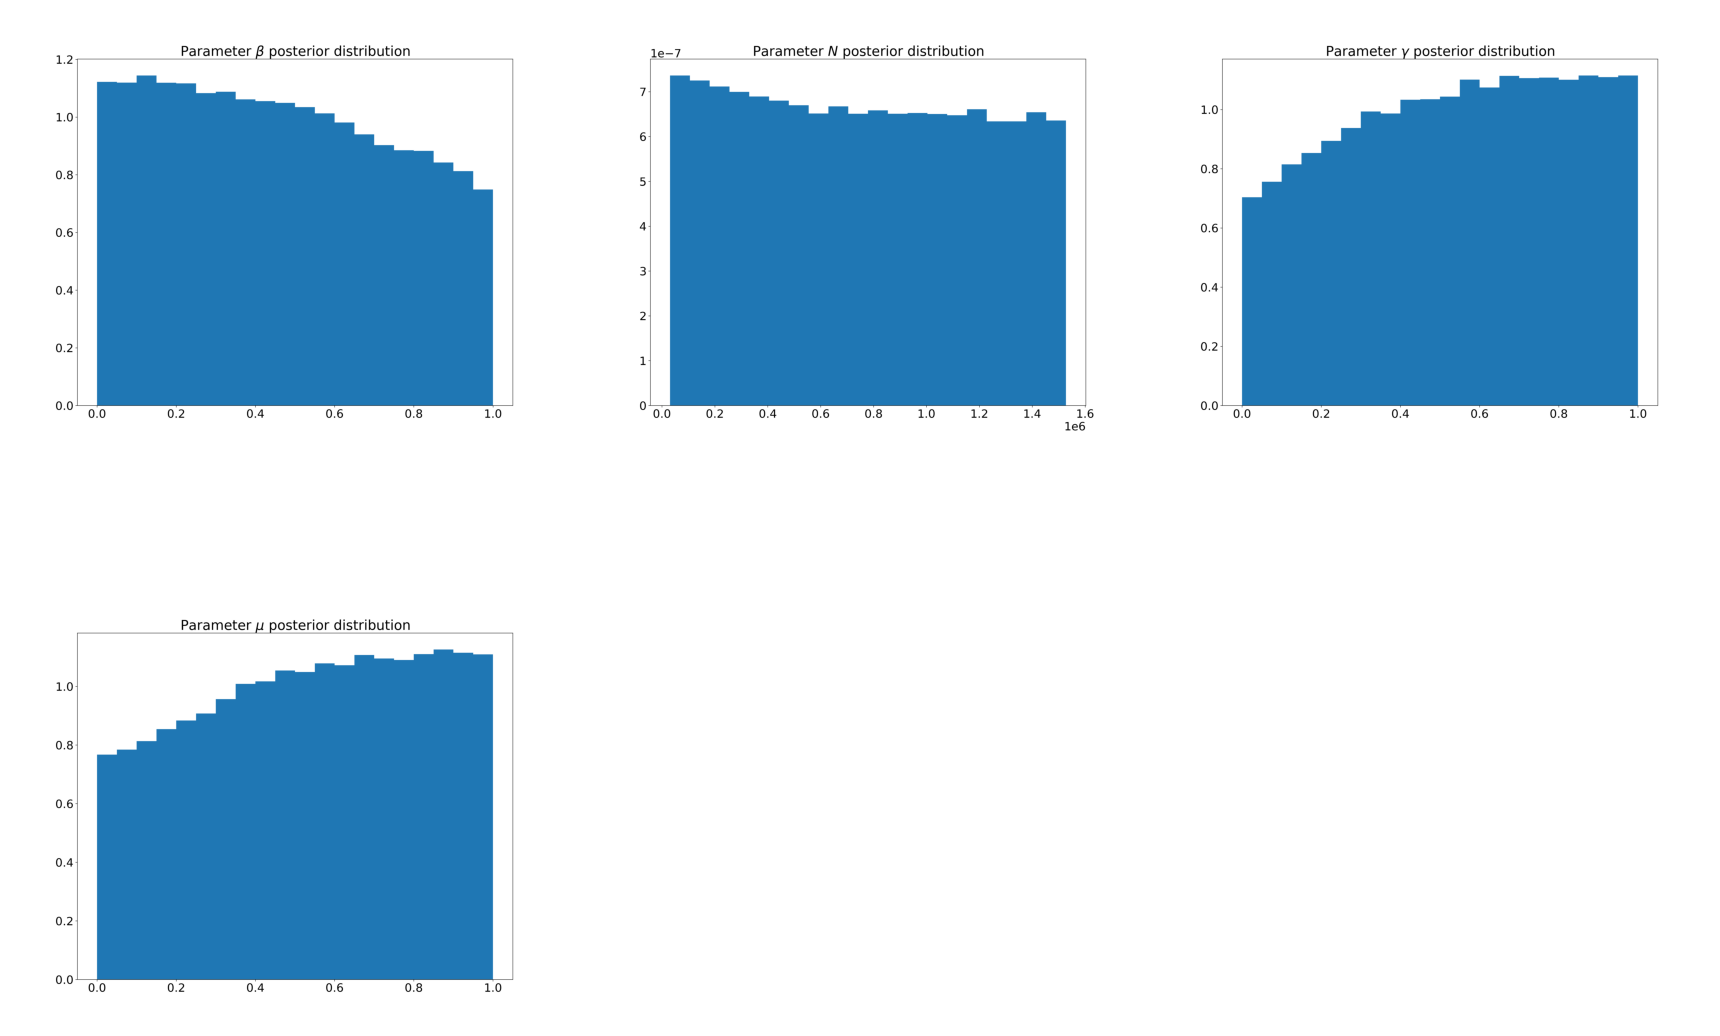

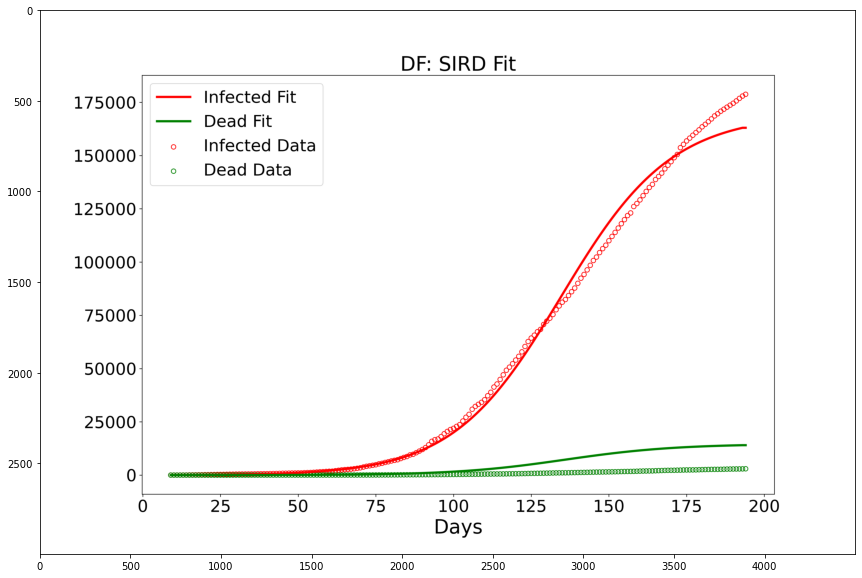

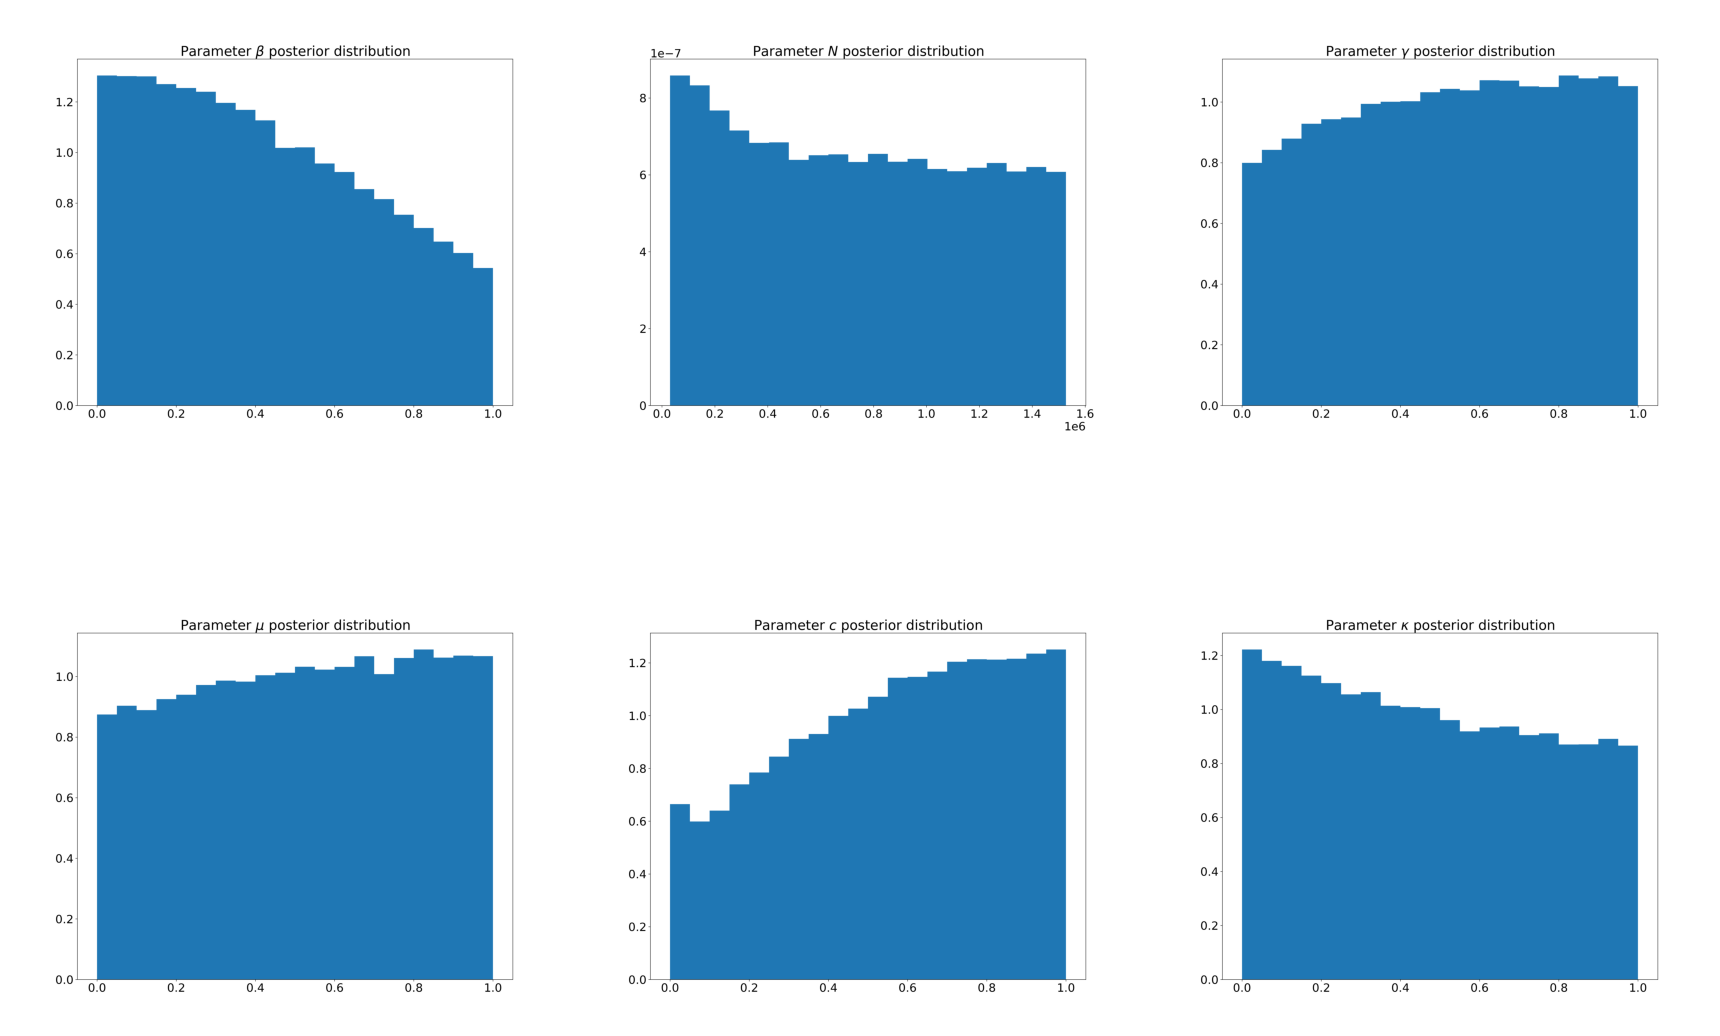

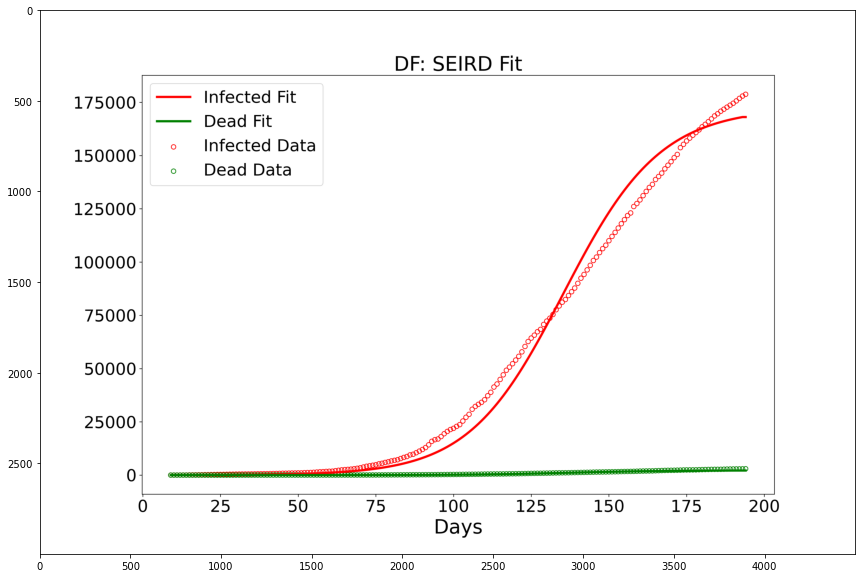

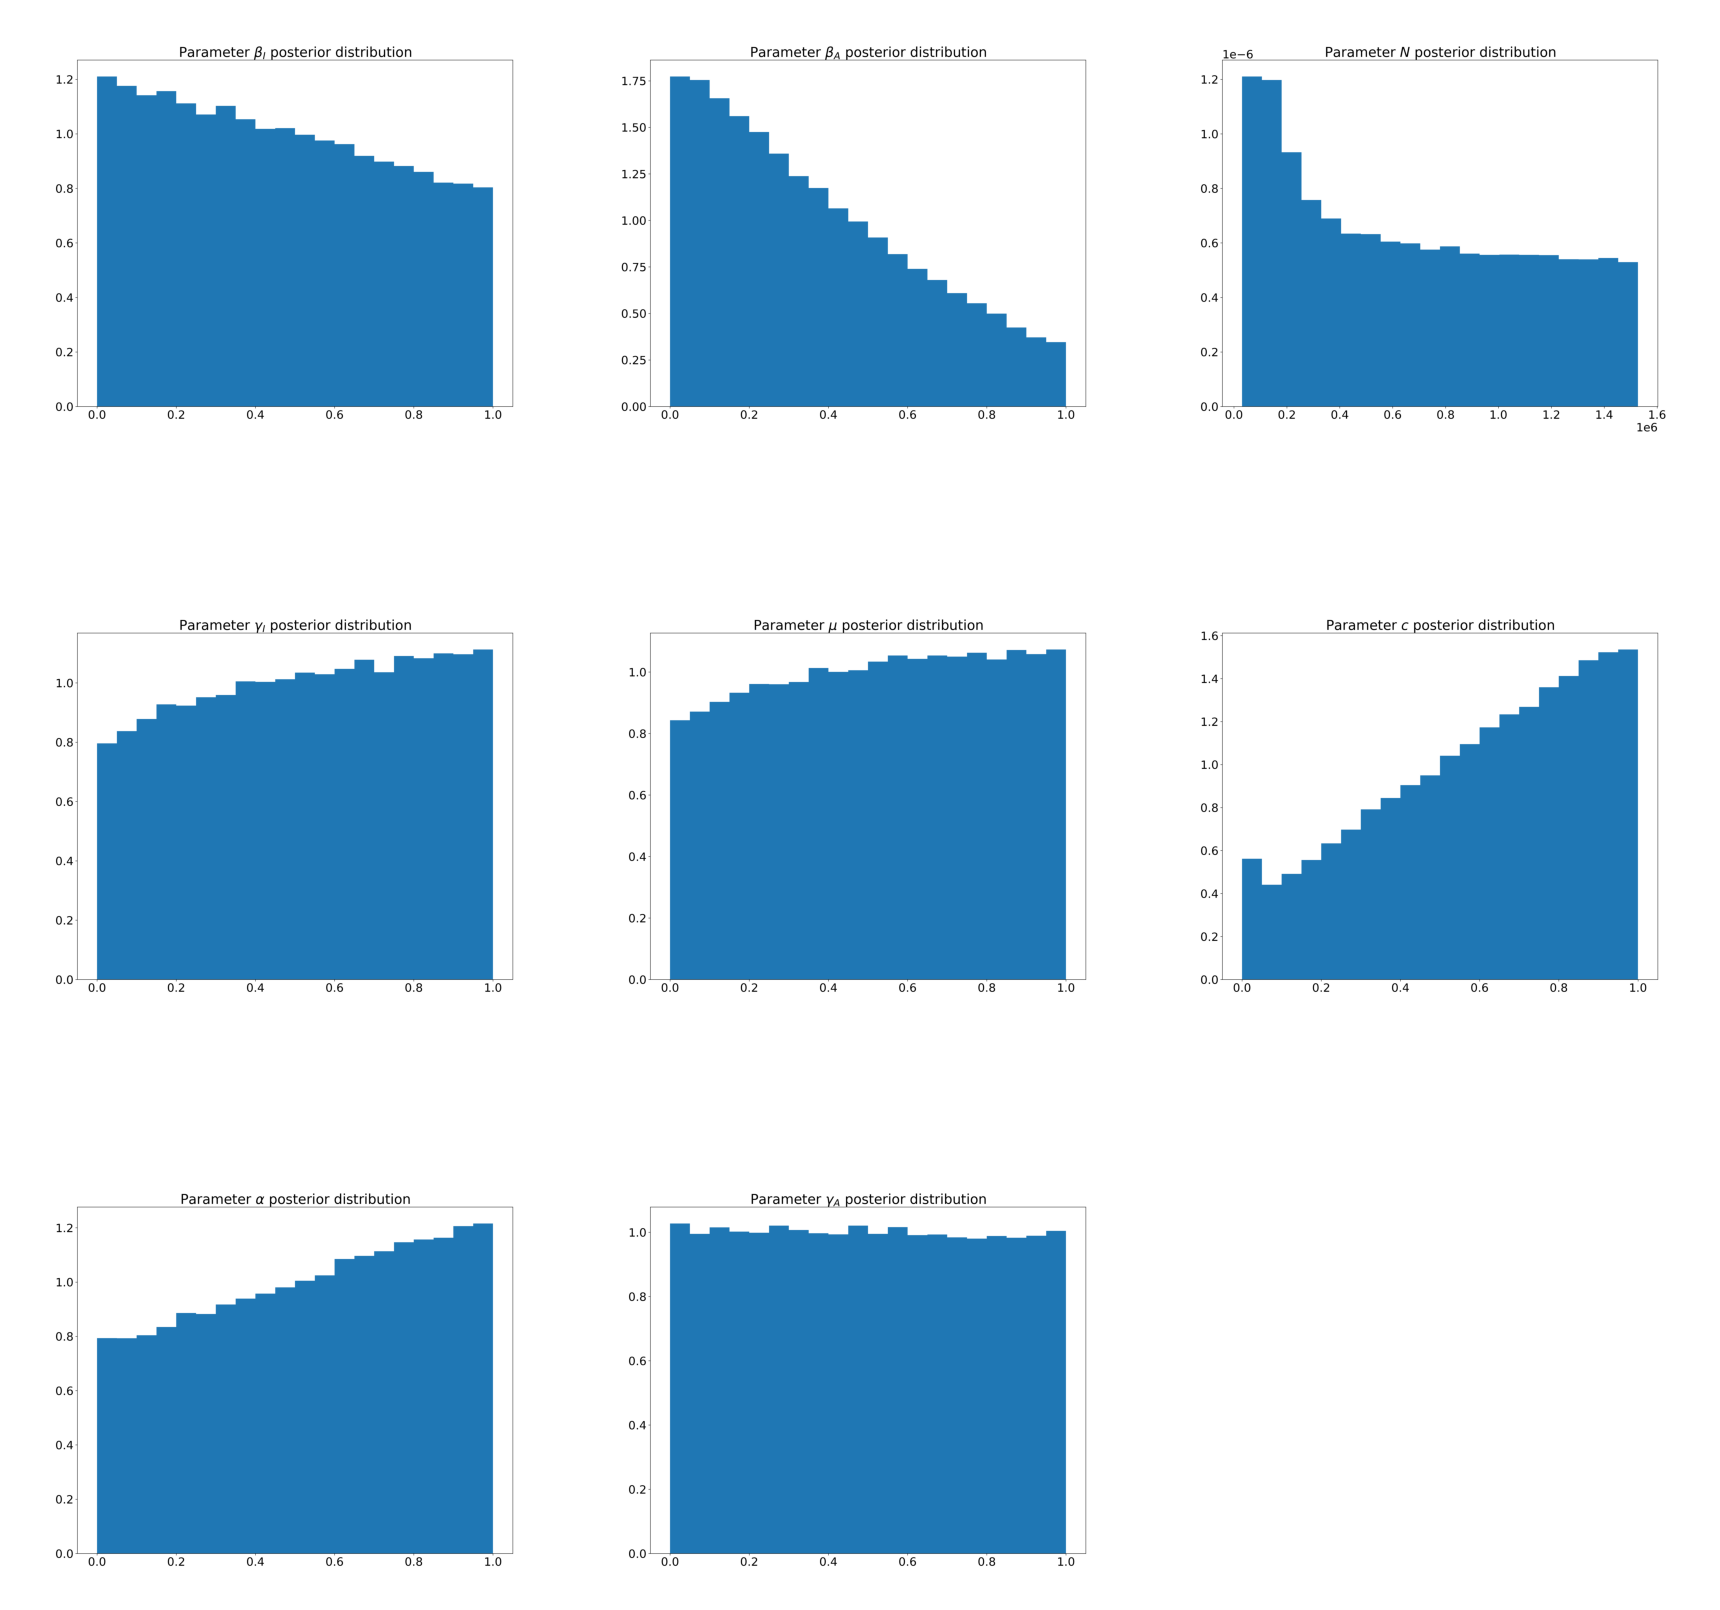

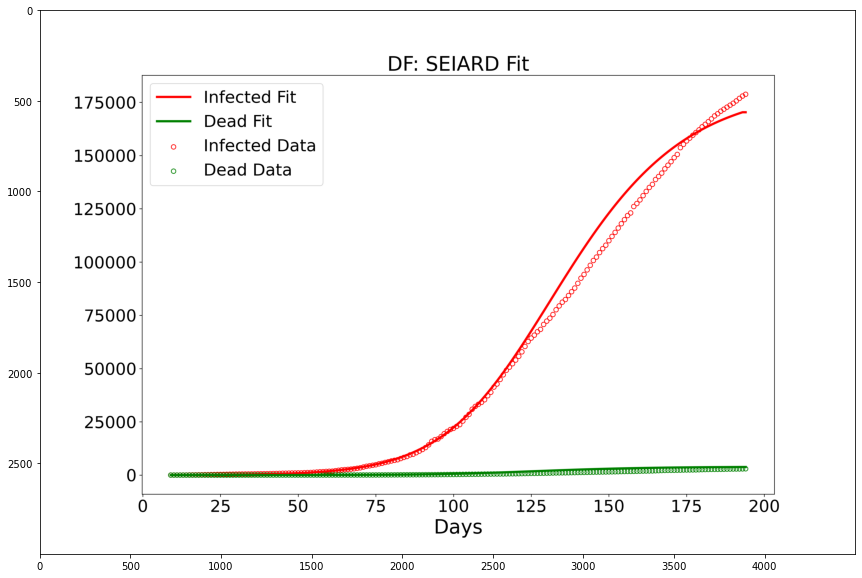

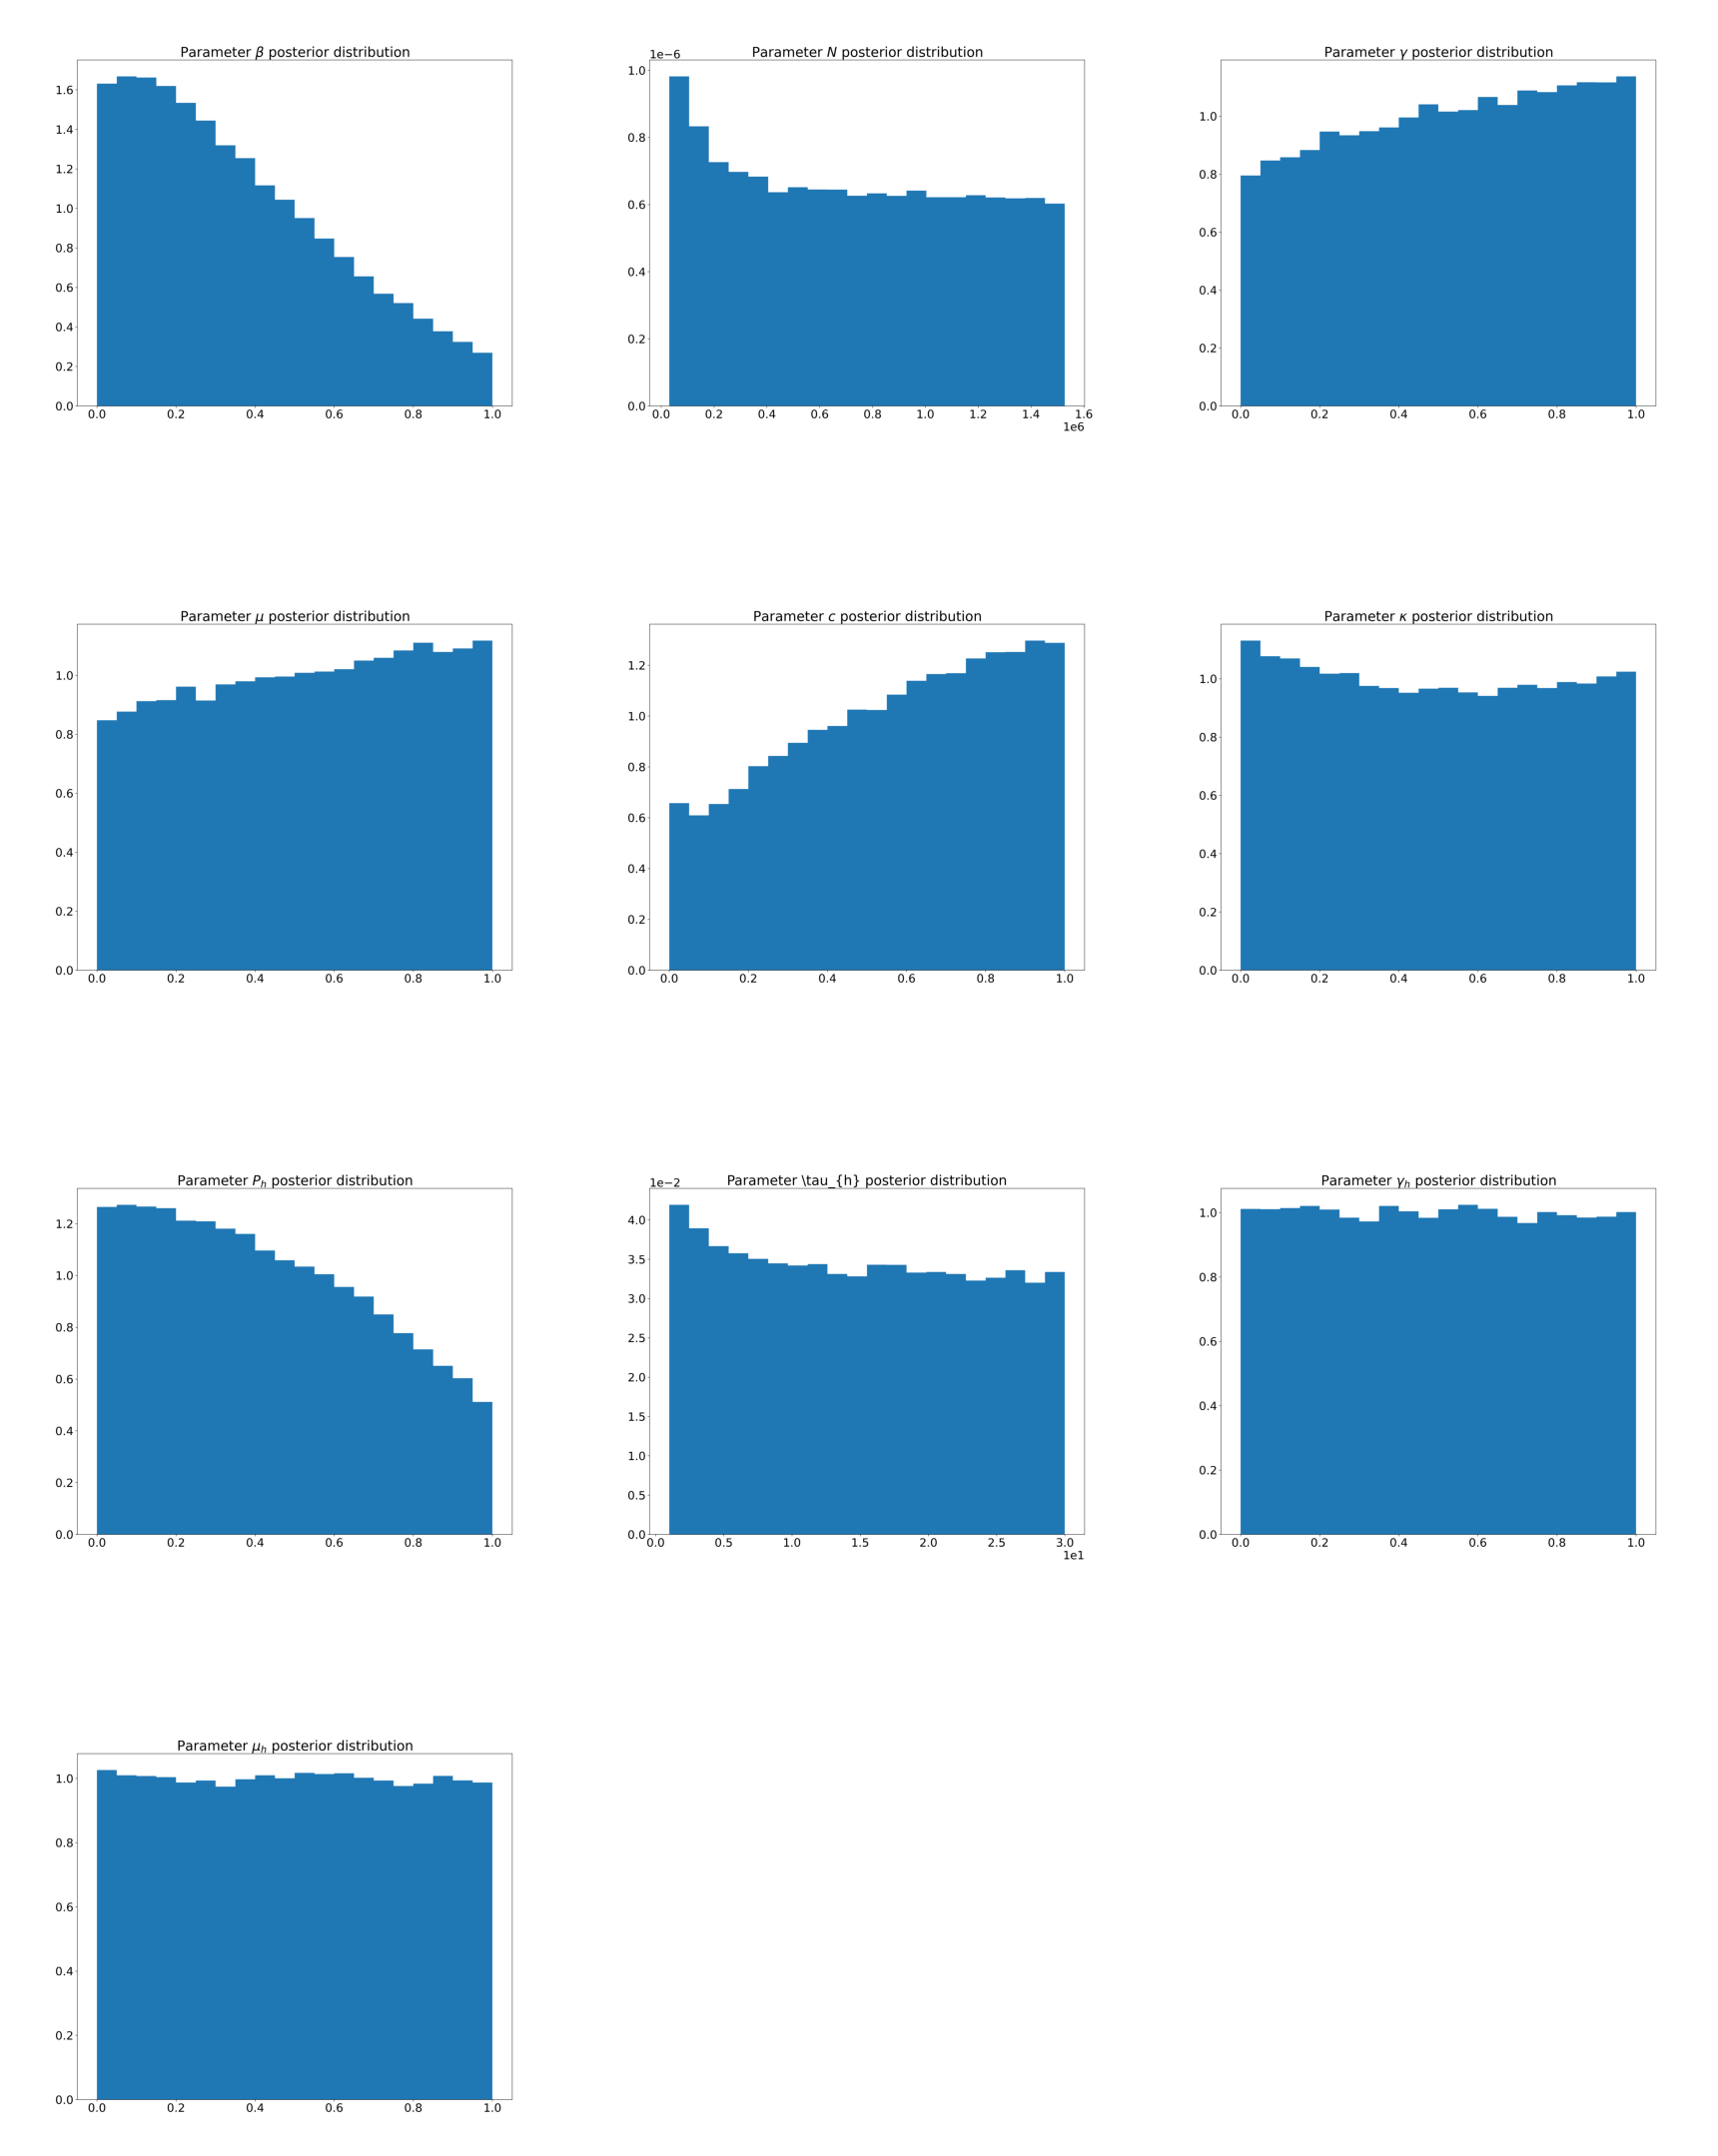

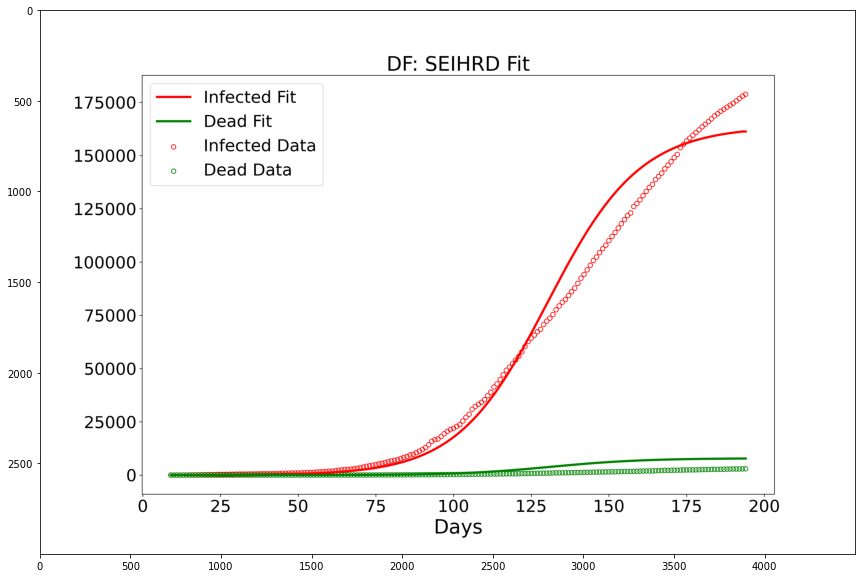

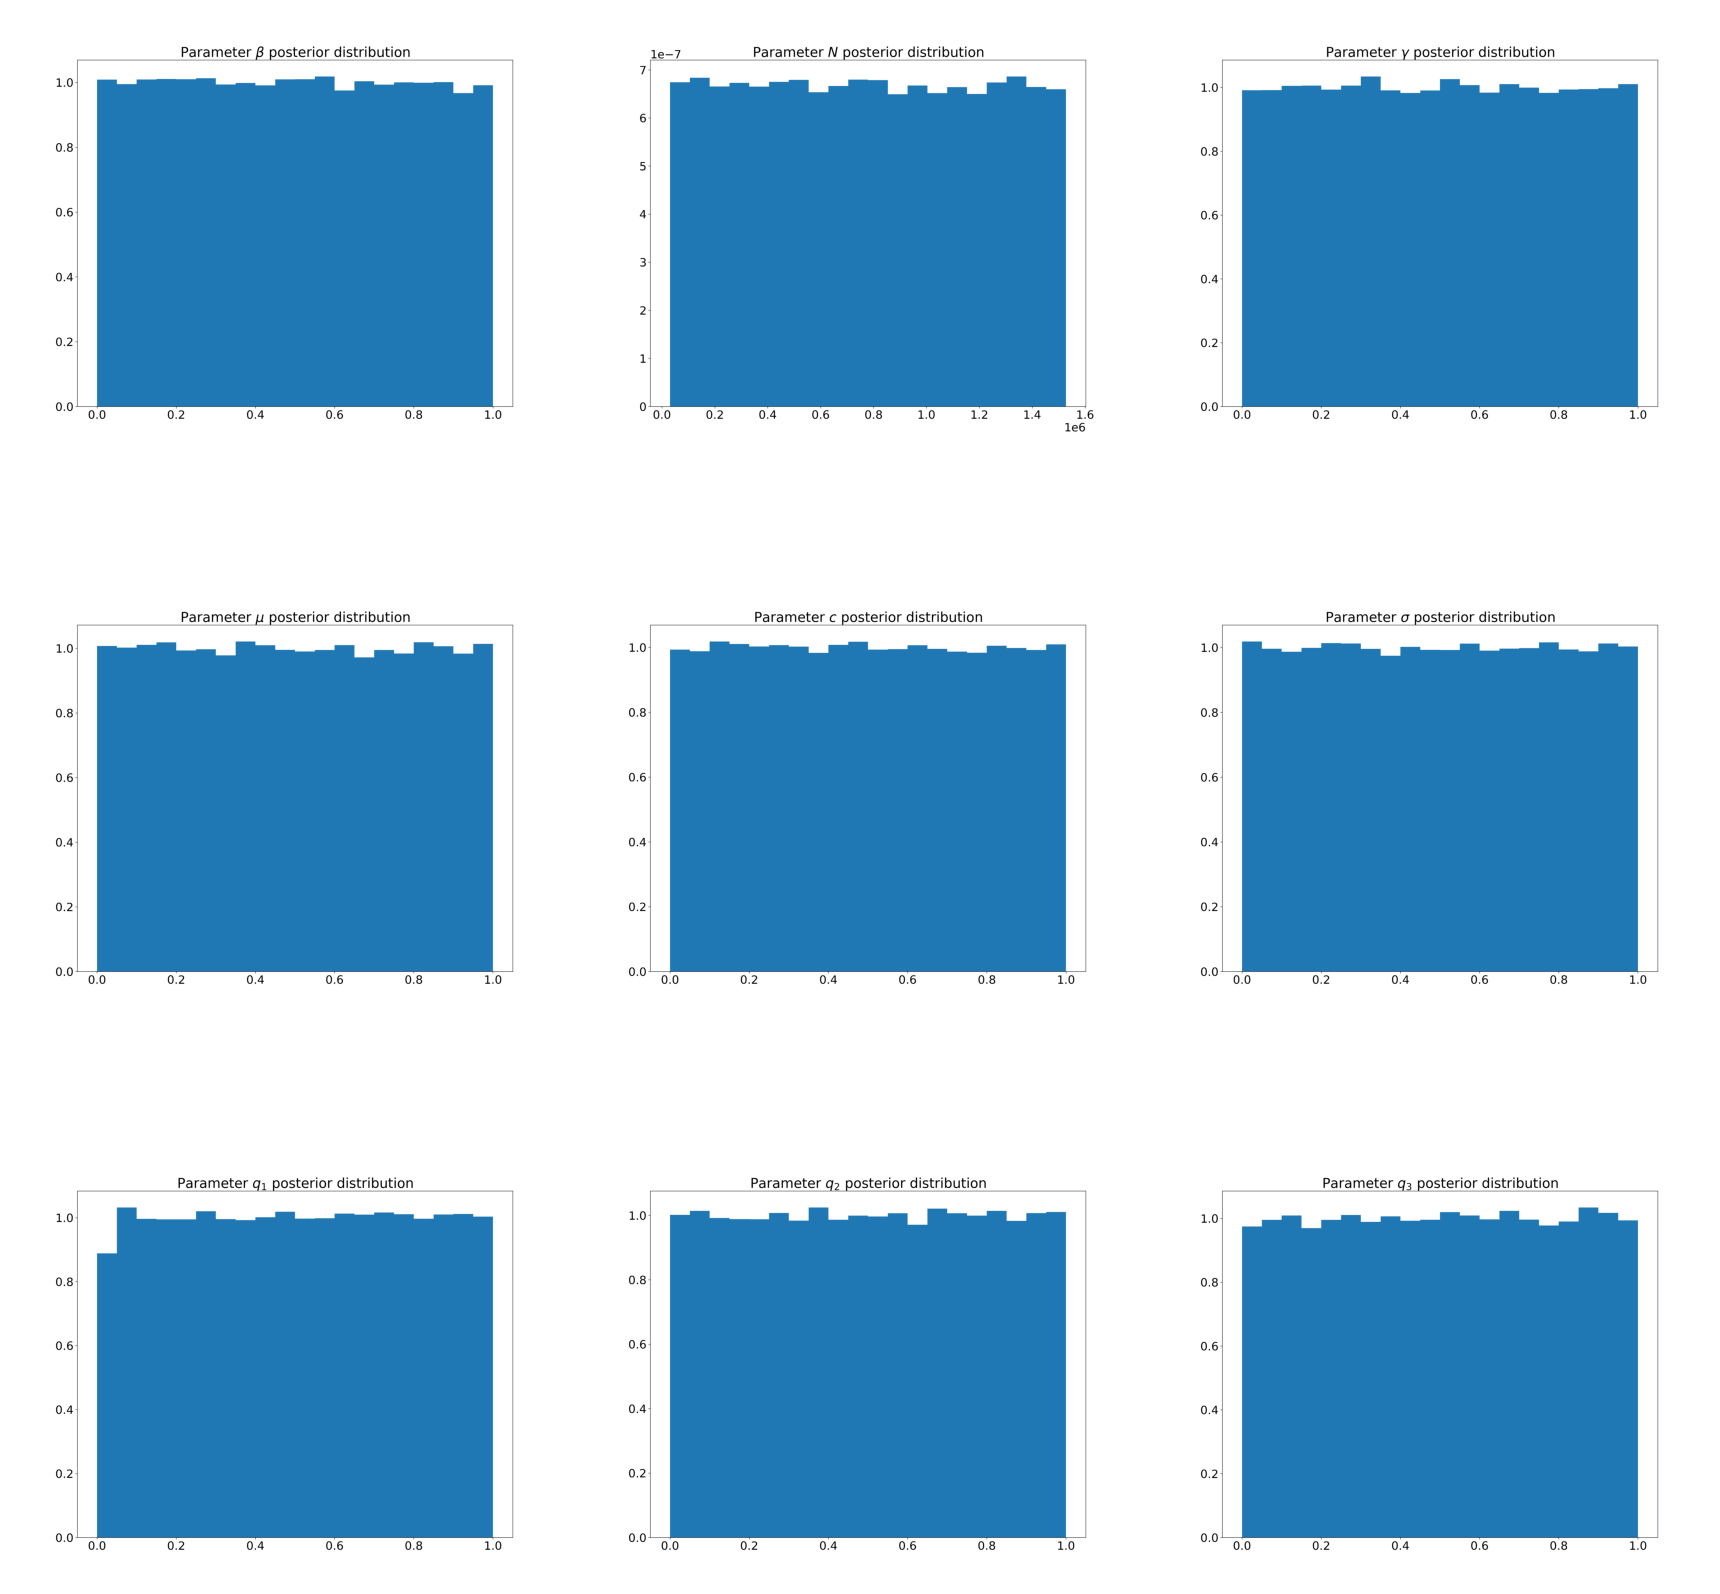

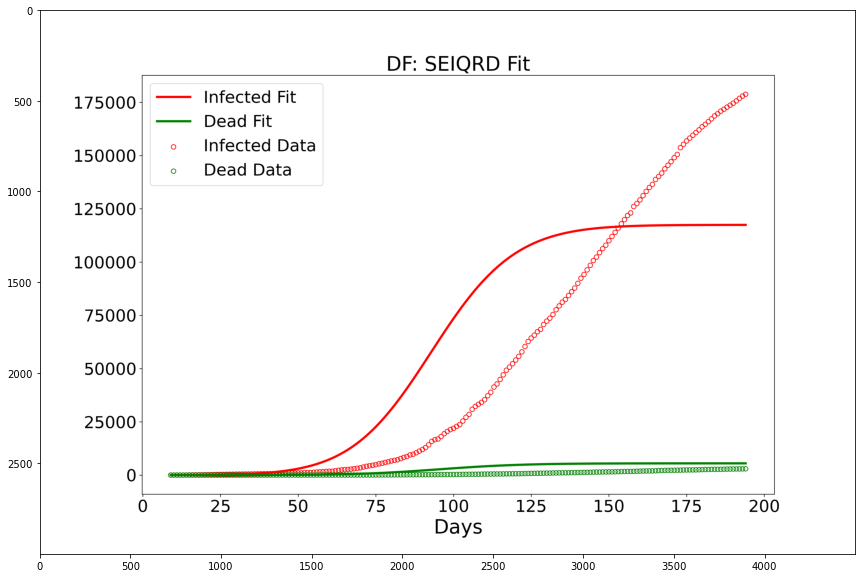

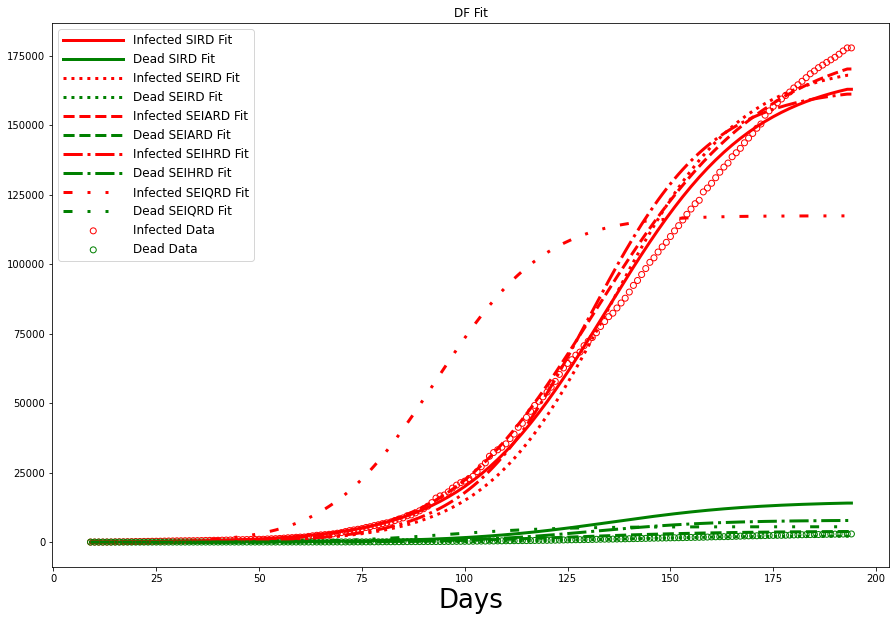

In [203]:
state = "DF"

for i in range(len(log)):
    
    if (state in log[i]):
        
        for j in range(25):
            
            print(log[i+j])
            
        break
            
for i in range(len(models)):
    
    results(state, models[i])    
    
all_curves(state)